In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

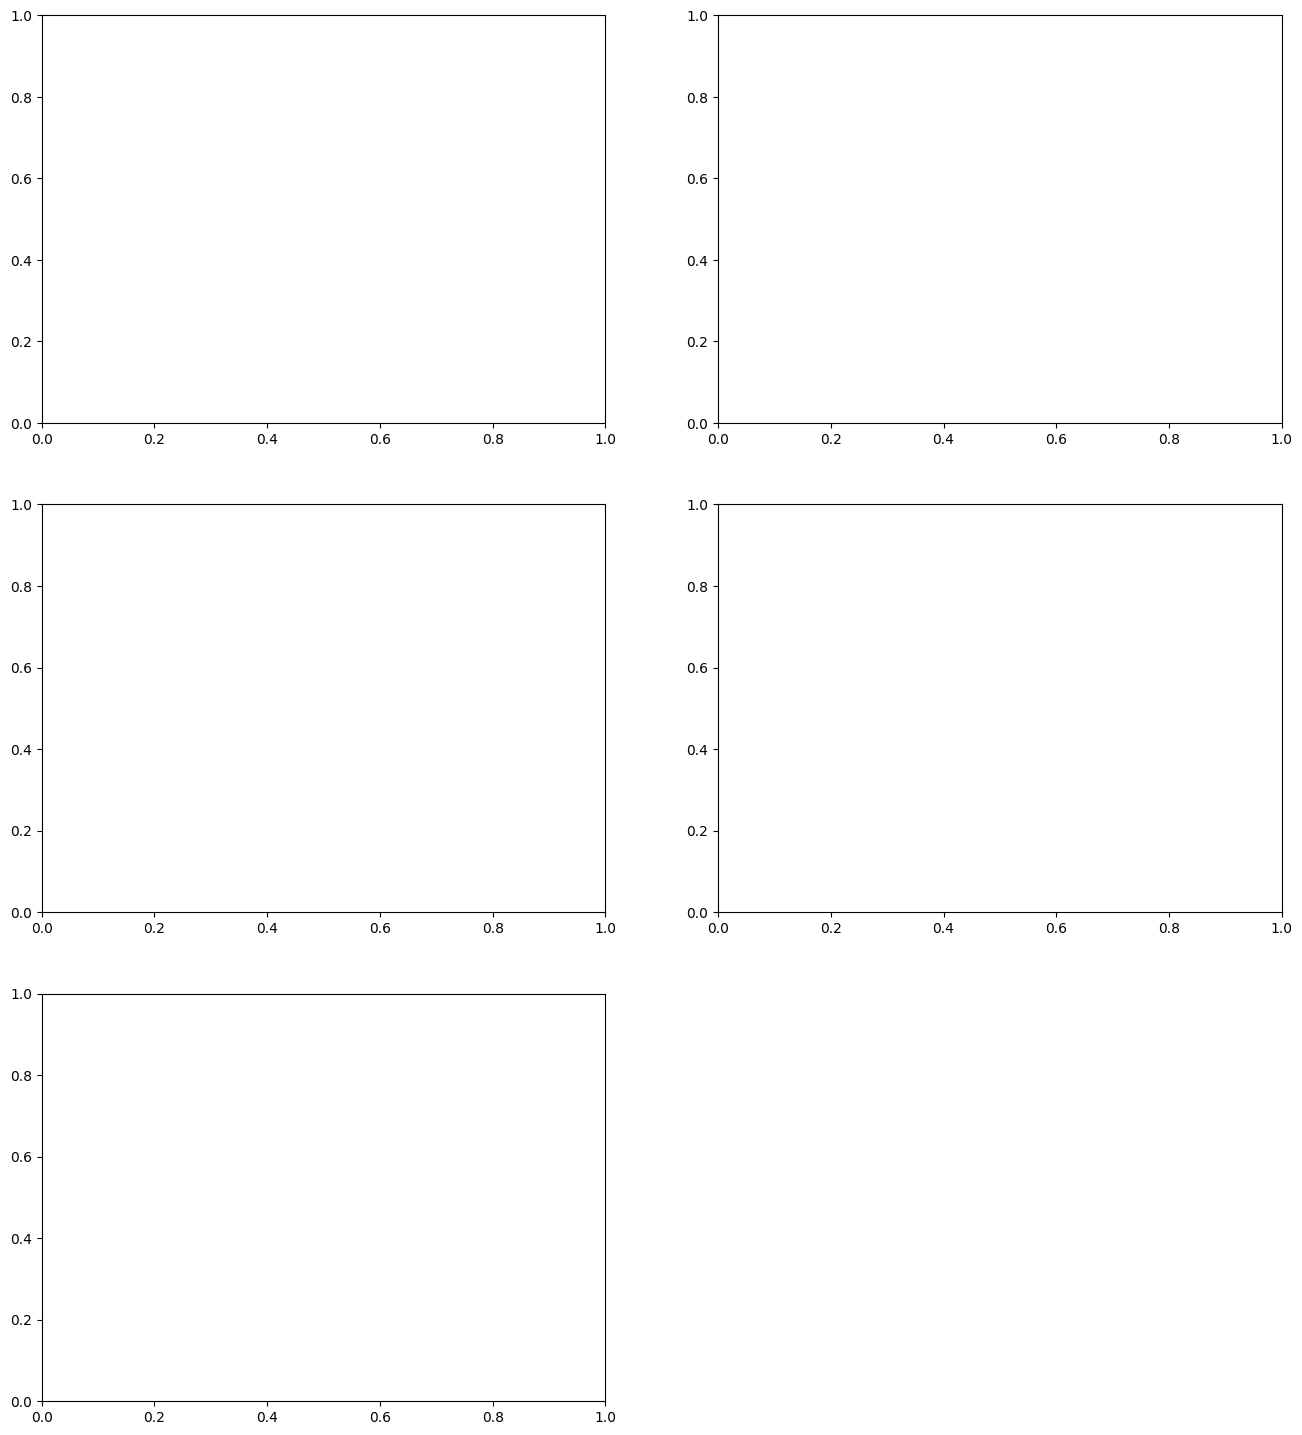

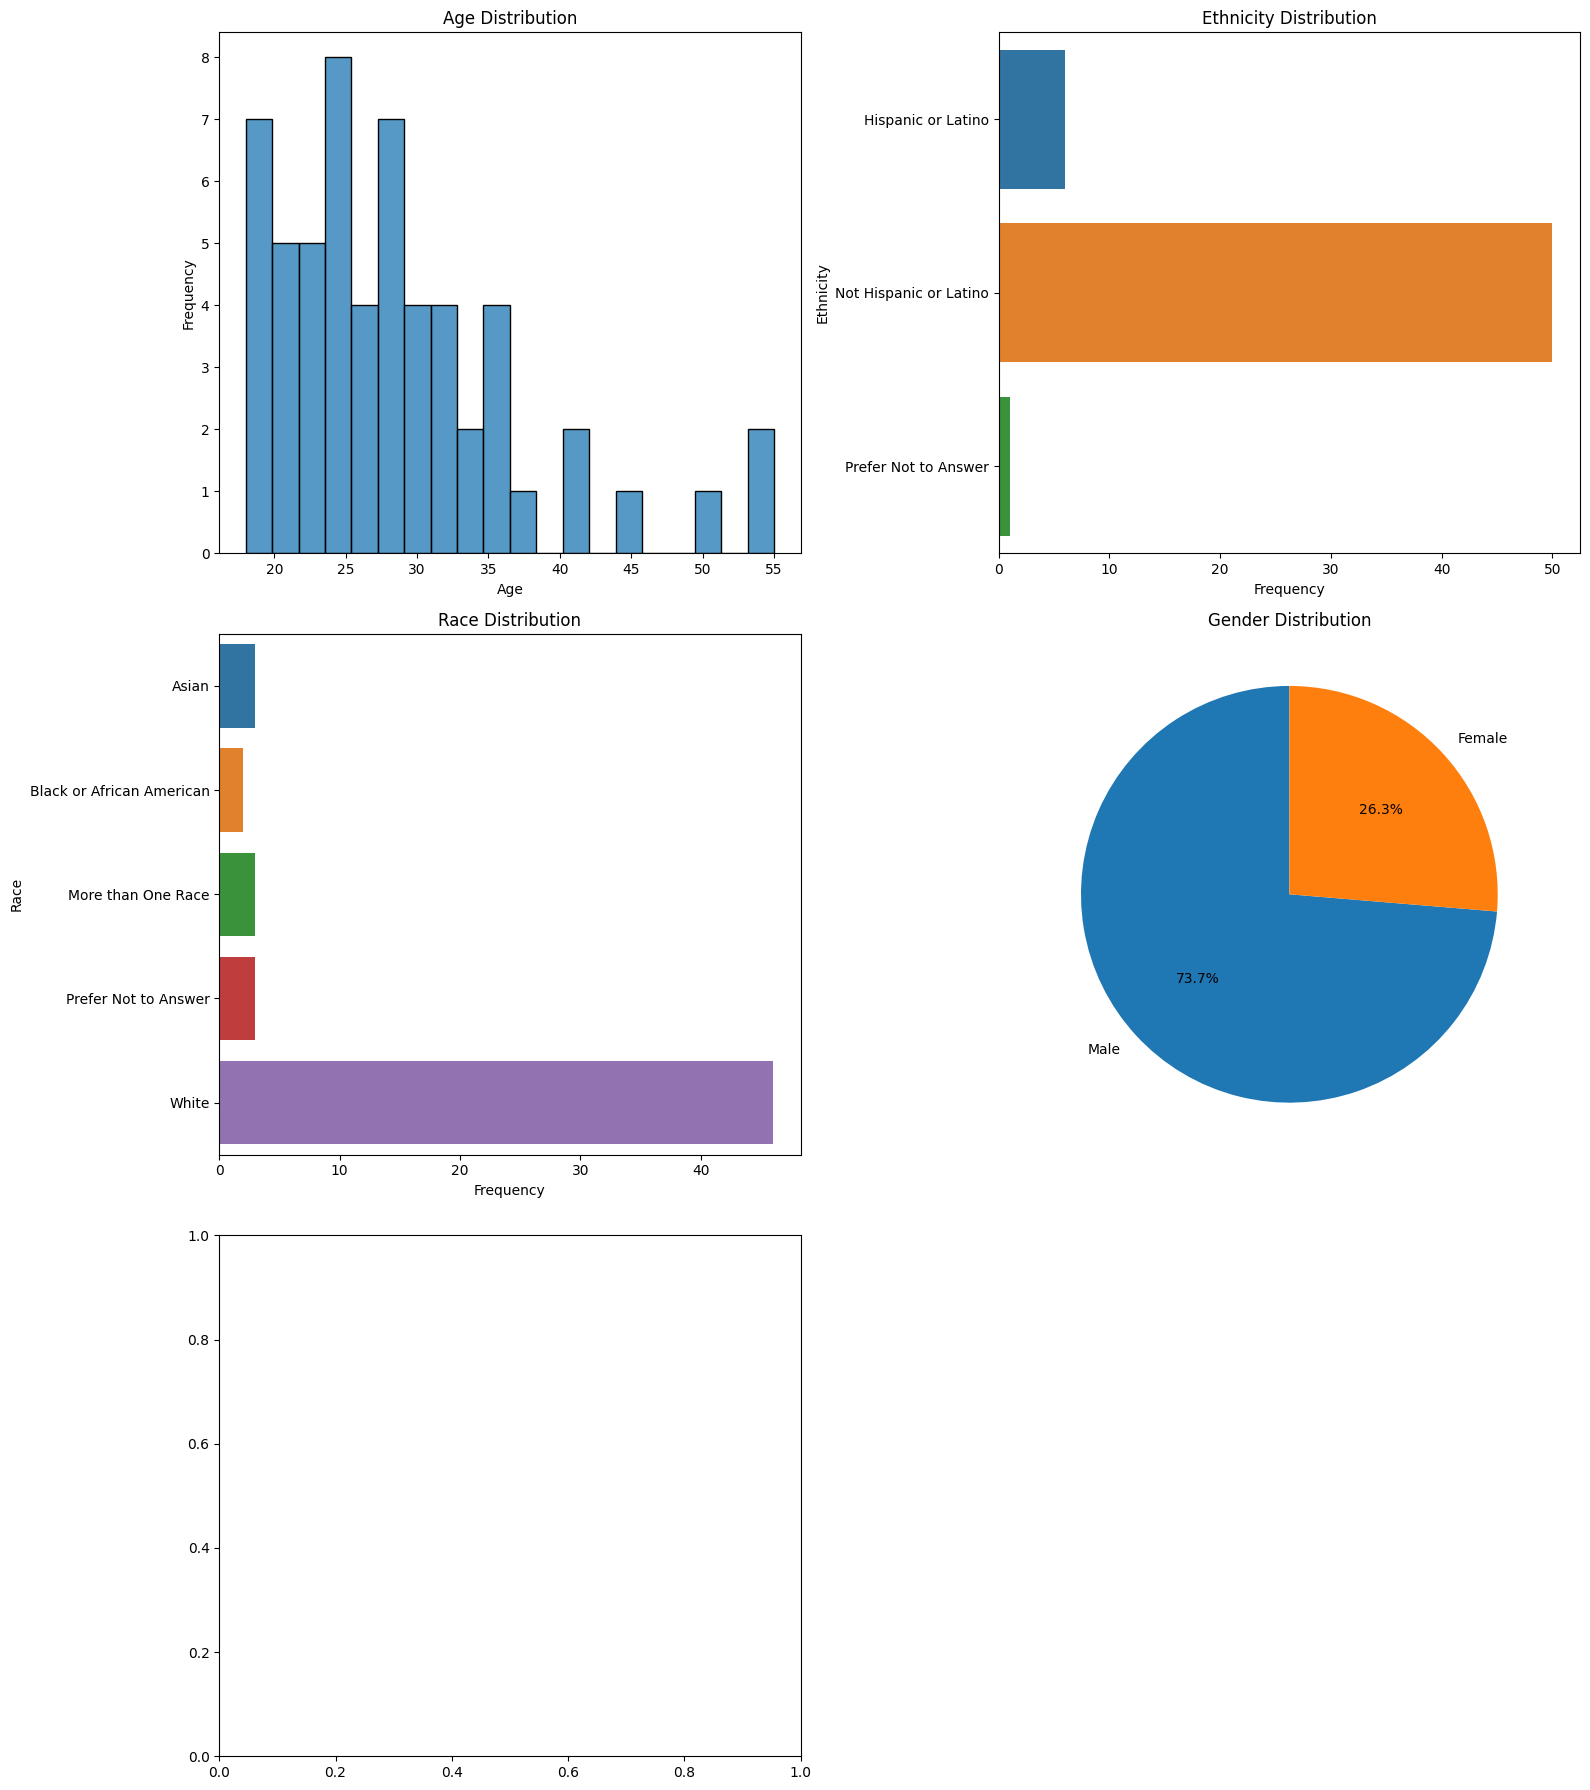

In [23]:
# Redefine the list of file paths for the uploaded CSV files
file_paths = [
    #'/Volumes/T7/CMU LiMN Research/perceptual organization/result & analysis/perceptual-similarity-complexTone_catSound/data/prolific-8-31/data_exp_141796-v3/data_exp_141796-v3_questionnaire-5cas.csv',
    #'/Volumes/T7/CMU LiMN Research/perceptual organization/result & analysis/perceptual-similarity-complexTone_everydaySound/data/prolific-8-29/data_exp_141710-v5/data_exp_141710-v5_questionnaire-5cas.csv',
    #'/Volumes/T7/CMU LiMN Research/perceptual organization/result & analysis/perceptual-similarity-everydaySound_catSound/data/prolific-8-29/data_exp_141798-v3/data_exp_141798-v3_questionnaire-5cas.csv'#,
    # '/Volumes/T7/CMU LiMN Research/perceptual organization/result & analysis/6.replicate-len4-Complextone-Catsounds/data/prolific-8-31/data_exp_141161-v2/data_exp_141161-v2_questionnaire-5cas.csv',
    #'/Volumes/T7/CMU LiMN Research/perceptual organization/result & analysis/7.replicate-len4-Complextone-Everydaysounds/data/prolific-8-29/data_exp_141875-v2/data_exp_141875-v2_questionnaire-5cas.csv'
    '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/data/12-15-data/data_exp_157418-v2/data_exp_157418-v2_questionnaire-5cas.csv'

]

# Demographic questions of interest
demographic_questions = ['age', 'languages', 'ethnicity', 'race', 'gender']

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each file, filter the data, and append it to the combined DataFrame
for file_path in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Filter only the required columns
    filtered_df = df[['Participant Private ID', 'Question Key', 'Response']]
    
    # Filter rows based on the demographic questions
    filtered_df = filtered_df[filtered_df['Question Key'].isin(demographic_questions)]
    
    # Append the filtered data to the combined DataFrame
    combined_df = pd.concat([combined_df, filtered_df], ignore_index=True)

# Create the plots again
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

# Flatten the array of axes for easier indexing
axes = axes.flatten()

# Remove the last plot as it's not needed
fig.delaxes(axes[-1])

# List of demographic questions and their respective plot types
demographics = [
    {'key': 'age', 'plot_type': 'histogram', 'title': 'Age Distribution'},
    #{'key': 'languages', 'plot_type': 'bar', 'title': 'Languages Spoken'},
    {'key': 'ethnicity', 'plot_type': 'bar', 'title': 'Ethnicity Distribution'},
    {'key': 'race', 'plot_type': 'bar', 'title': 'Race Distribution'},
    {'key': 'gender', 'plot_type': 'pie', 'title': 'Gender Distribution'}
]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

# Flatten the array of axes for easier indexing
axes = axes.flatten()

# Remove the last plot as it's not needed
fig.delaxes(axes[-1])

# Loop through the demographics list and plot each one
for i, demo in enumerate(demographics):
    ax = axes[i]
    data = combined_df[combined_df['Question Key'] == demo['key']]['Response']
    
    if demo['plot_type'] == 'histogram':
        # Convert age data to numeric and sort
        data = pd.to_numeric(data, errors='coerce').dropna().sort_values()
        sns.histplot(data, bins=20, kde=False, ax=ax)
        ax.set_xlabel('Age')
        ax.set_ylabel('Frequency')
    elif demo['plot_type'] == 'bar':
        sns.countplot(y=data, ax=ax, order = data.value_counts().index.sort_values())
        ax.set_xlabel('Frequency')
        ax.set_ylabel(demo['key'].capitalize())
    elif demo['plot_type'] == 'pie':
        data.value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90)
        ax.set_ylabel('')
    
    ax.set_title(demo['title'])

plt.tight_layout()
plt.show()


In [24]:
# Demographic questions of interest
demographic_questions = ['age', 'languages', 'ethnicity', 'race', 'gender']

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each file, filter the data, and append it to the combined DataFrame
for file_path in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Filter only the required columns
    filtered_df = df[['Participant Private ID', 'Question Key', 'Response']]
    
    # Filter rows based on the demographic questions
    filtered_df = filtered_df[filtered_df['Question Key'].isin(demographic_questions)]
    
    # Append the filtered data to the combined DataFrame
    combined_df = pd.concat([combined_df, filtered_df], ignore_index=True)

# Count the number of subjects for each gender category
gender_counts = combined_df[combined_df['Question Key'] == 'gender']['Response'].value_counts()

print("Exact number of subjects for each gender category:")
print(gender_counts)

Exact number of subjects for each gender category:
Response
Male      42
Female    15
Name: count, dtype: int64


In [25]:
# Calculate the mean and standard deviation for the age group
# First, convert the age data to numeric values for proper calculations
age_data = pd.to_numeric(combined_df[combined_df['Question Key'] == 'age']['Response'], errors='coerce').dropna()

# # Remove the first occurrence of 35
# index_to_remove_35 = age_data[age_data == 35].idxmax()
# age_data = age_data.drop(index_to_remove_35)

# # Remove the first occurrence of 30
# index_to_remove_30 = age_data[age_data == 30].idxmax()
# age_data = age_data.drop(index_to_remove_30)

# Calculate the mean and standard deviation
age_mean = age_data.mean()
age_std = age_data.std()
age_max = age_data.max()
age_min = age_data.min()

# Count the number of unique subjects
total_subjects = combined_df['Participant Private ID'].nunique()

age_mean, age_std, total_subjects, age_max, age_min

(28.526315789473685, 8.531674729161358, 57, 55, 18)